In [16]:
import os.path
import glob
import csv
import gzip
from collections import namedtuple, defaultdict, Counter
from typing import Tuple, Set, Dict
import pandas as pd
import matplotlib.pyplot as plot


FIELDS = ["sentence", "label", "probs"]
Sentence = namedtuple("Sentence", FIELDS)
Results = namedtuple("Results", ["category", "model", "data", "total_positives", "total_negatives"])

def reader(filepath: str) -> Tuple[str, str, Dict[str, Set[str]],]:
    basename = os.path.basename(filepath)
    category, model, *_run_data = basename.split(".")
    data = {"positive": set(), "negative": set()}
    with gzip.open(filepath, mode="rt") as f:
        reader = csv.DictReader(f)
        poss, negs = 0, 0
        for row in reader:
            if row["label"] == "positive":
                poss += 1
            else:
                negs += 1
            if row["ok"] != "True":
                data[row["label"]].add(Sentence(
                    **{k:v for k, v in row.items() if k in FIELDS}
                ))
    return Results(category, model, data, poss, negs)


# Parse

In [17]:
ALL = defaultdict(lambda: defaultdict(list))
for file in glob.glob("./test_dumps/*.csv.gz"):
    res = reader(file)
    ALL[res.category][res.model].append(res)

# Analyze

Positives that are never recognized: 21.35% (98) of all positives; 32.03% of all unique errors (306) in positives
Negatives that are never recognized: 0.24% (18) of all negatives; 5.08% of all unique errors (354) in negatives


Positives that are never recognized: 21.35% (98) of all positives; 35.38% of all unique errors (277) in positives
Negatives that are never recognized: 0.33% (25) of all negatives; 6.93% of all unique errors (361) in negatives


Positives that are never recognized: 18.30% (84) of all positives; 31.34% of all unique errors (268) in positives
Negatives that are never recognized: 0.40% (30) of all negatives; 6.96% of all unique errors (431) in negatives


Positives that are never recognized: 20.48% (94) of all positives; 32.53% of all unique errors (289) in positives
Negatives that are never recognized: 0.27% (20) of all negatives; 4.89% of all unique errors (409) in negatives


Positives that are never recognized: 17.65% (81) of all positives; 28.72% of all unique errors (282) in positives
Negatives that are never recognized: 0.43% (32) of all negatives; 7.26% of all unique errors (441) in negatives


Positives that are never recognized: 10.89% (50) of all positives; 14.12% of all unique errors (354) in positives
Negatives that are never recognized: 0.12% (9) of all negatives; 1.08% of all unique errors (830) in negatives


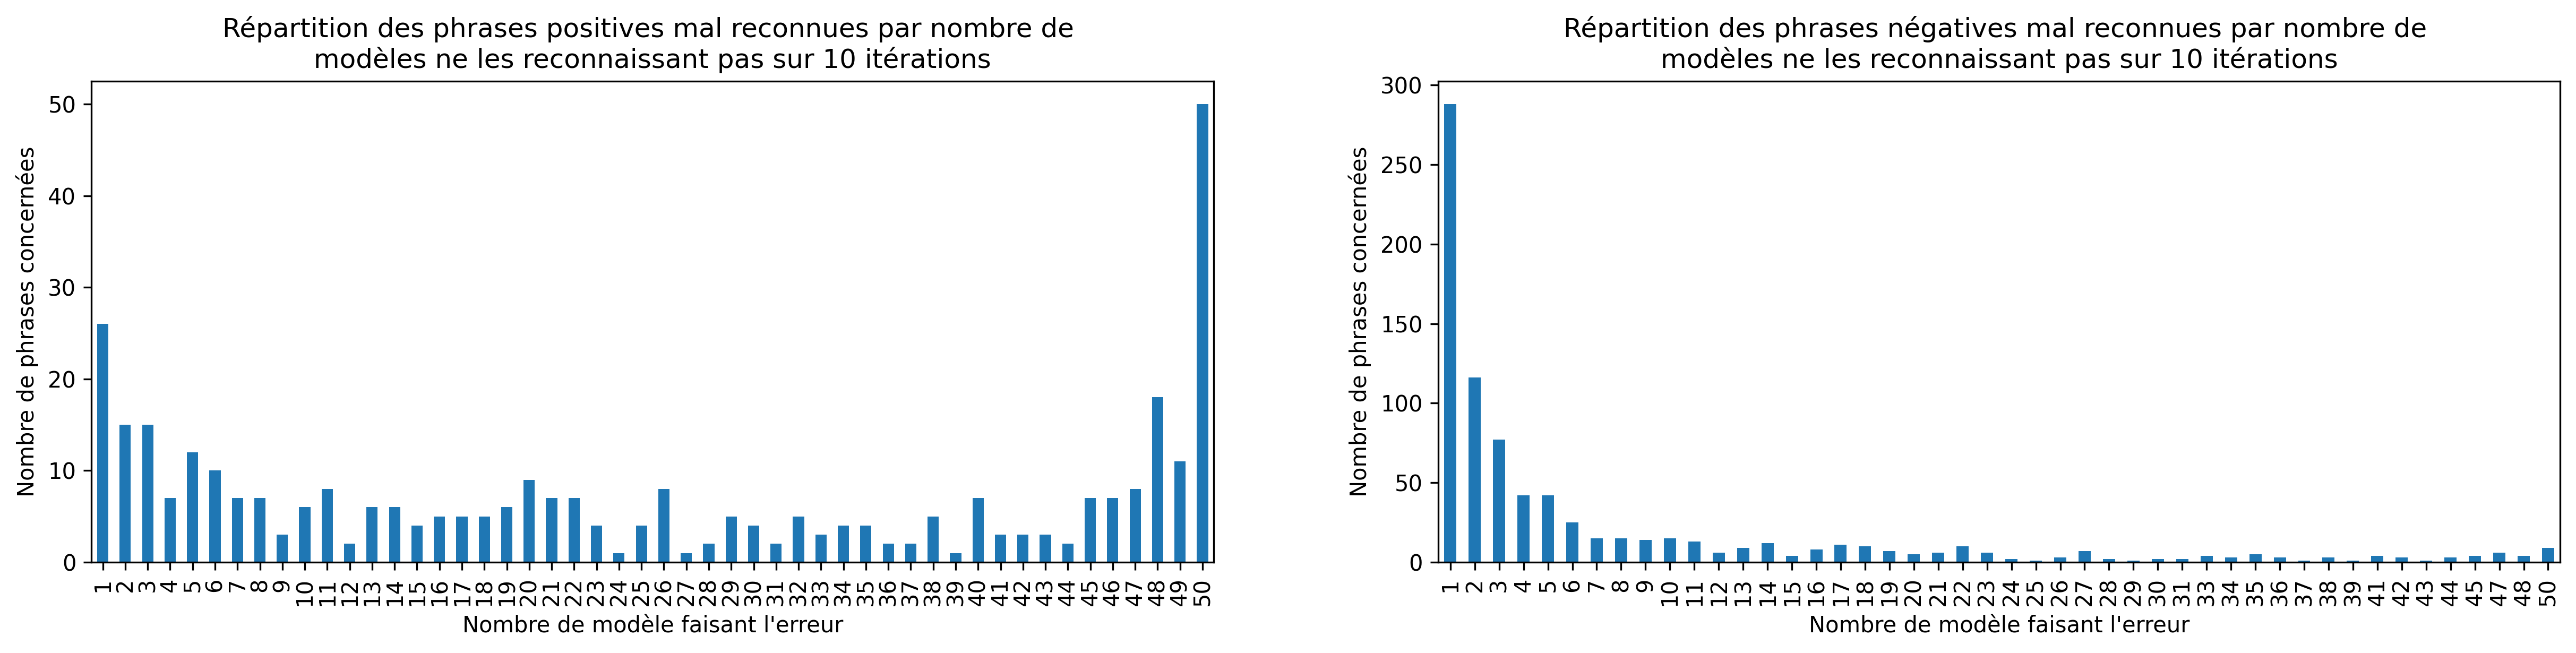

Positives that are never recognized: 42.49% (874) of all positives; 48.99% of all unique errors (1784) in positives
Negatives that are never recognized: 0.03% (2) of all negatives; 1.41% of all unique errors (142) in negatives


Positives that are never recognized: 44.29% (911) of all positives; 54.75% of all unique errors (1664) in positives
Negatives that are never recognized: 0.01% (1) of all negatives; 1.00% of all unique errors (100) in negatives


Positives that are never recognized: 42.44% (873) of all positives; 52.62% of all unique errors (1659) in positives
Negatives that are never recognized: 0.01% (1) of all negatives; 1.04% of all unique errors (96) in negatives


Positives that are never recognized: 44.14% (908) of all positives; 50.53% of all unique errors (1797) in positives
Negatives that are never recognized: 0.01% (1) of all negatives; 0.75% of all unique errors (133) in negatives


Positives that are never recognized: 42.25% (869) of all positives; 51.39% of all unique errors (1691) in positives
Negatives that are never recognized: 0.00% (0) of all negatives; 0.00% of all unique errors (106) in negatives


Positives that are never recognized: 27.47% (565) of all positives; 29.94% of all unique errors (1887) in positives
Negatives that are never recognized: 0.00% (0) of all negatives; 0.00% of all unique errors (267) in negatives


<Figure size 432x288 with 0 Axes>

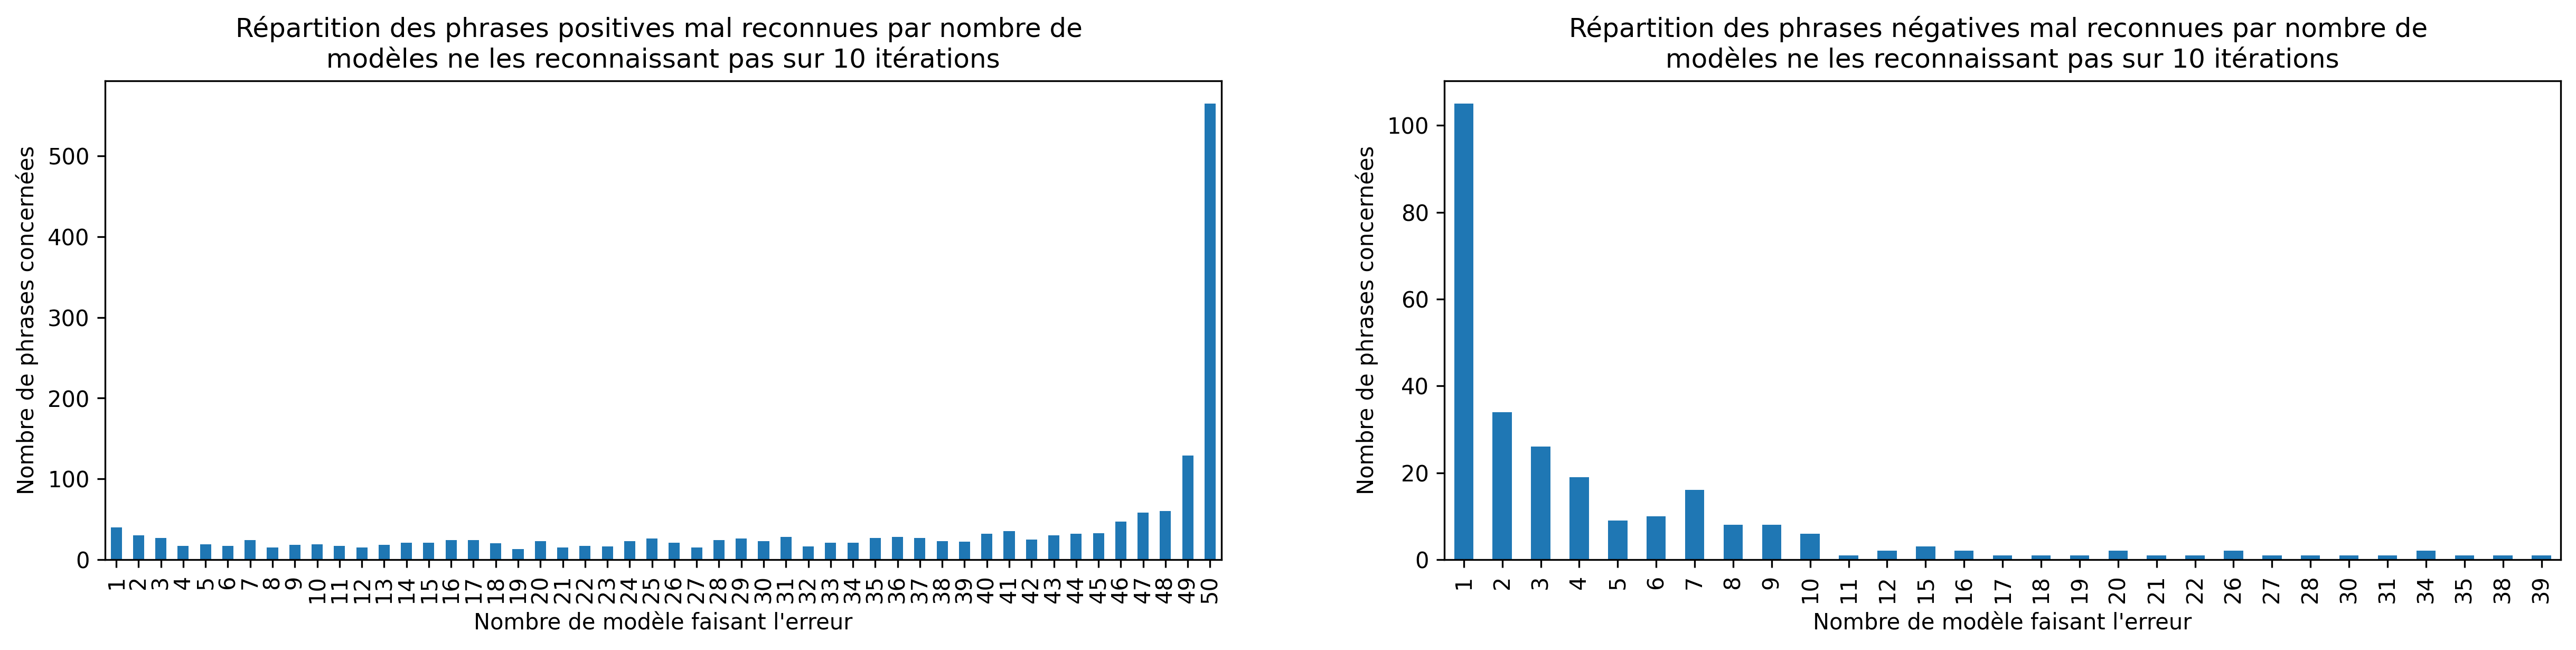

Positives that are never recognized: 20.72% (52) of all positives; 28.11% of all unique errors (185) in positives
Negatives that are never recognized: 0.12% (3) of all negatives; 2.07% of all unique errors (145) in negatives


Positives that are never recognized: 23.11% (58) of all positives; 38.67% of all unique errors (150) in positives
Negatives that are never recognized: 0.64% (16) of all negatives; 13.56% of all unique errors (118) in negatives


Positives that are never recognized: 21.12% (53) of all positives; 35.10% of all unique errors (151) in positives
Negatives that are never recognized: 0.52% (13) of all negatives; 9.15% of all unique errors (142) in negatives


Positives that are never recognized: 12.75% (32) of all positives; 15.76% of all unique errors (203) in positives
Negatives that are never recognized: 0.04% (1) of all negatives; 0.48% of all unique errors (210) in negatives


<Figure size 432x288 with 0 Axes>

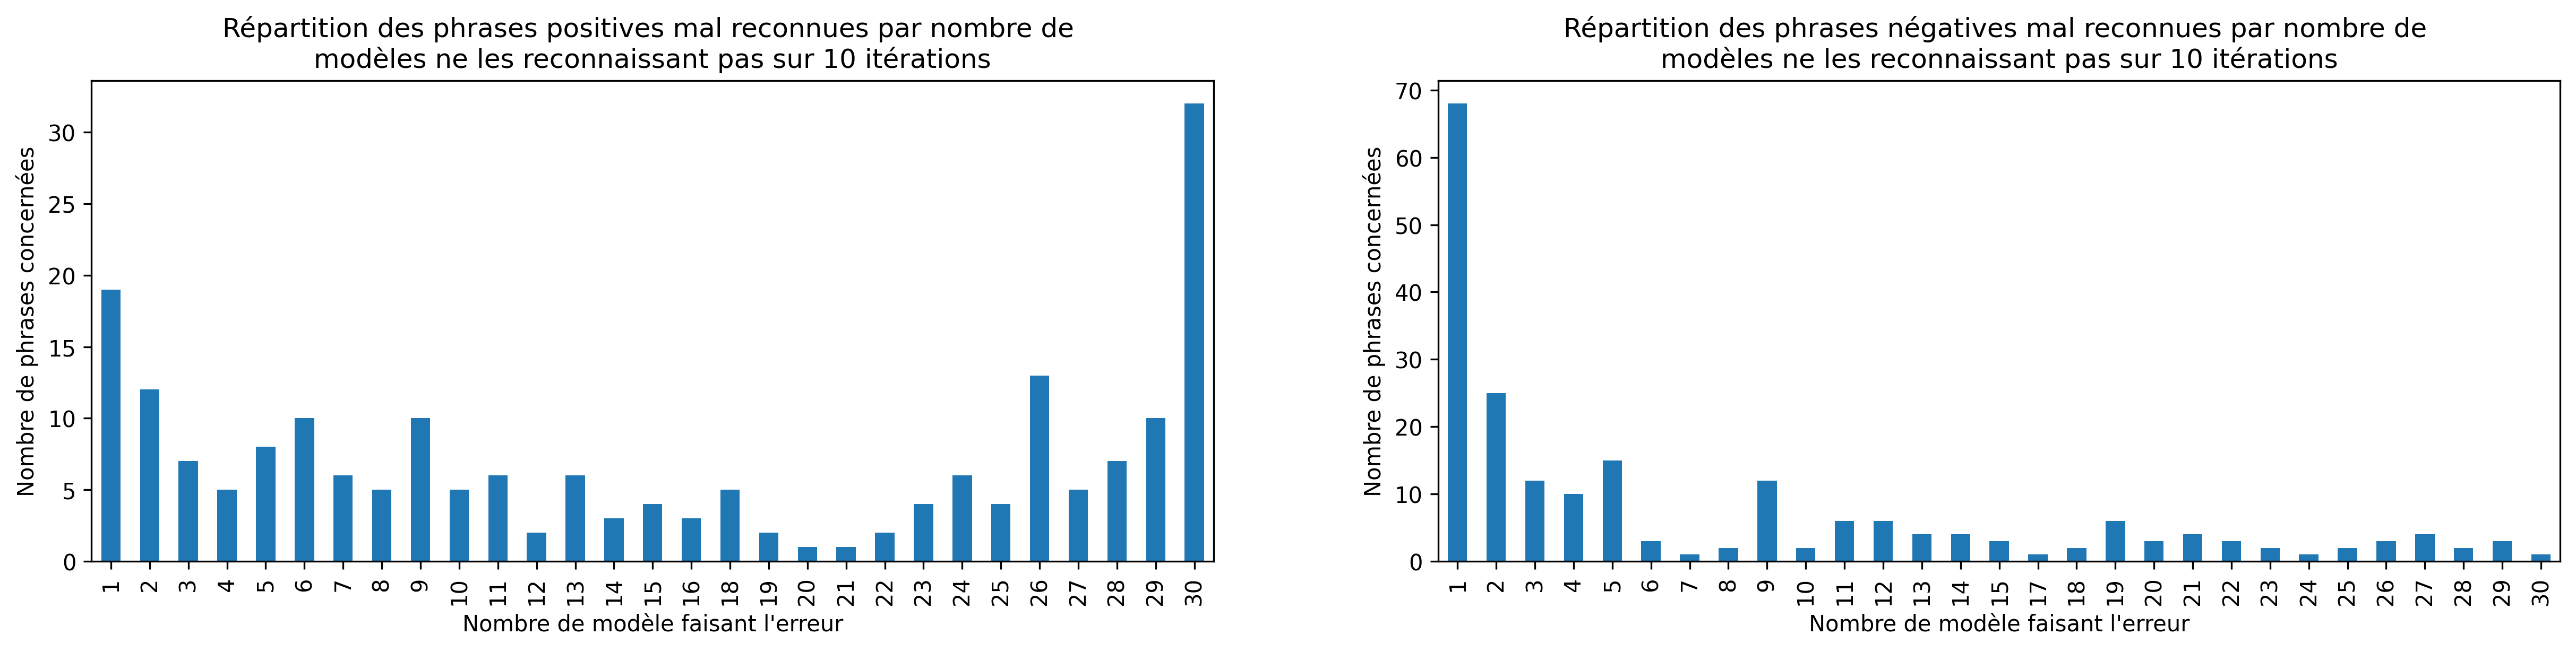

Positives that are never recognized: 12.35% (31) of all positives; 28.44% of all unique errors (109) in positives
Negatives that are never recognized: 0.28% (7) of all negatives; 8.54% of all unique errors (82) in negatives


Positives that are never recognized: 11.16% (28) of all positives; 23.33% of all unique errors (120) in positives
Negatives that are never recognized: 0.24% (6) of all negatives; 6.00% of all unique errors (100) in negatives


Positives that are never recognized: 10.76% (27) of all positives; 25.23% of all unique errors (107) in positives
Negatives that are never recognized: 0.32% (8) of all negatives; 7.27% of all unique errors (110) in negatives


Positives that are never recognized: 10.76% (27) of all positives; 25.71% of all unique errors (105) in positives
Negatives that are never recognized: 0.32% (8) of all negatives; 7.69% of all unique errors (104) in negatives


Positives that are never recognized: 5.58% (14) of all positives; 9.79% of all unique errors (143) in positives
Negatives that are never recognized: 0.20% (5) of all negatives; 2.79% of all unique errors (179) in negatives


<Figure size 432x288 with 0 Axes>

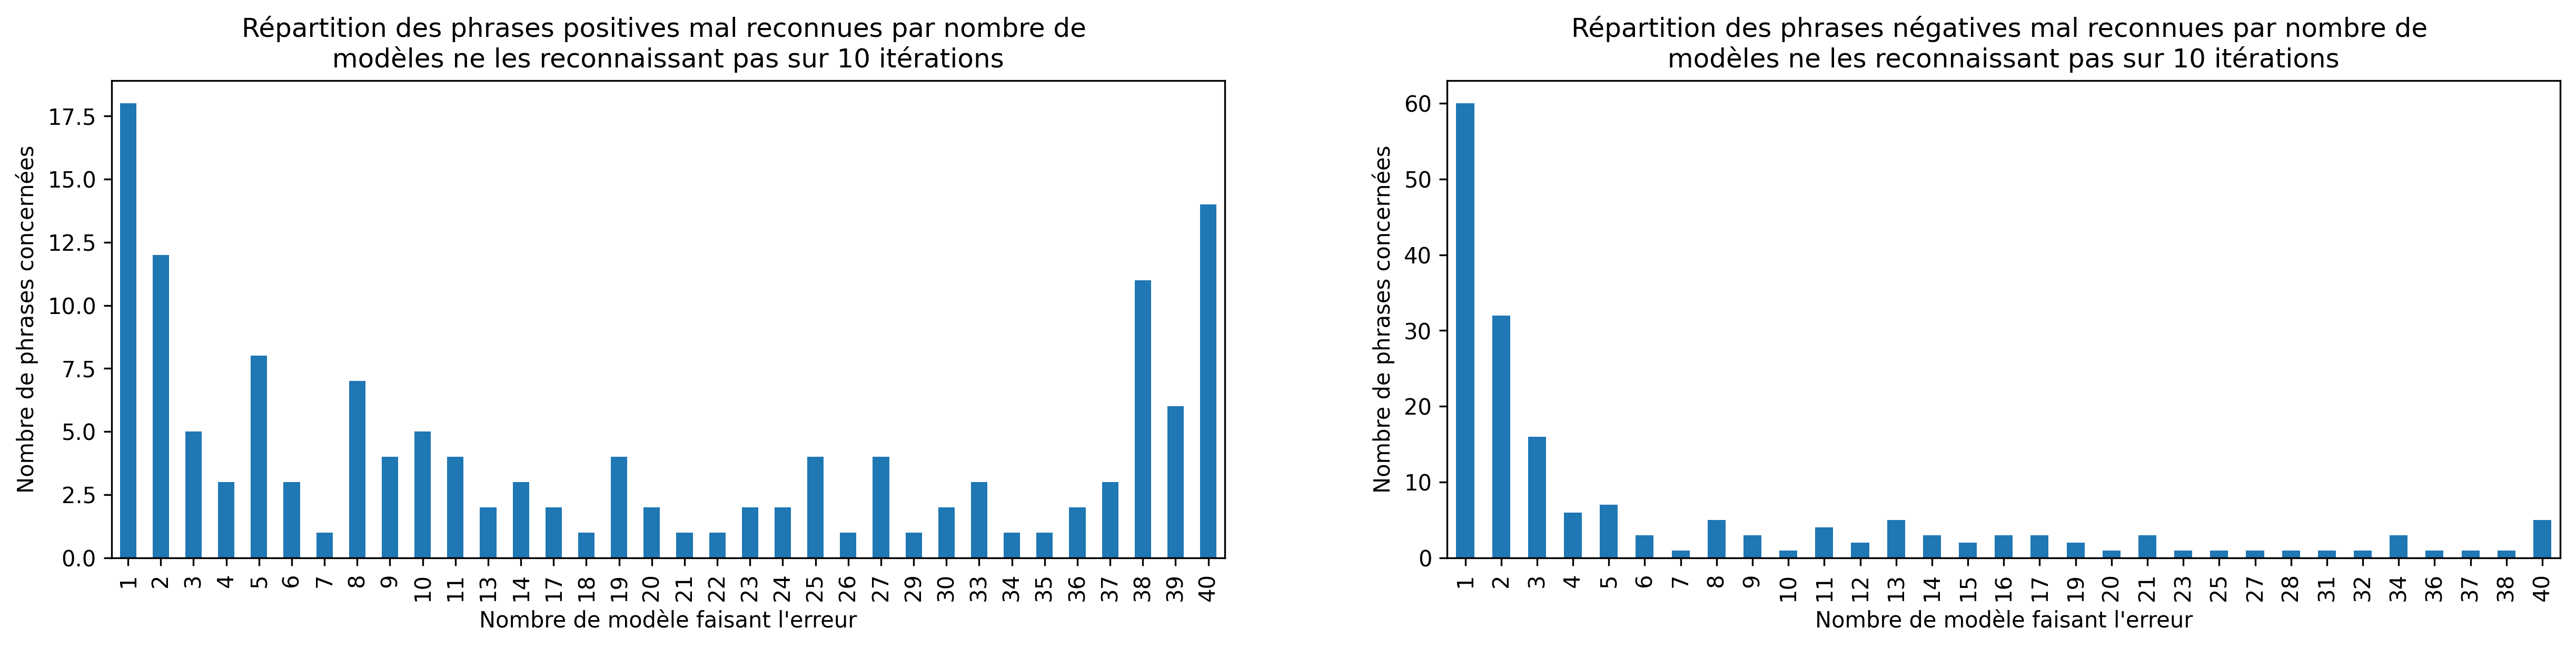

<Figure size 432x288 with 0 Axes>

In [27]:
from IPython.core.display import display, HTML 

DO_PLOT = False
DO_PLOT_ALL = True

for category in ALL:
    display(HTML(f"<h3>{category.capitalize()}</h3>"))
    
    all_positives = Counter()
    all_negatives = Counter()
    for model in ALL[category]:
        display(HTML(f"<h4>{model}</h4>"))
        positives = Counter([
            sentence.sentence
            for results in ALL[category][model]
            for sentence in results.data["positive"]
        ])
        negatives = Counter([
            sentence.sentence
            for results in ALL[category][model]
            for sentence in results.data["negative"]
        ])
        all_positives.update(positives)
        all_negatives.update(negatives)
        
        
        _max = len(ALL[category][model])
        always_pos = [sent for sent in positives if positives[sent] >= 10]
        always_neg = [sent for sent in negatives if negatives[sent] >= 10]
        print(f"Positives that are never recognized: "
              f"{100*len(always_pos)/ALL[category][model][-1].total_positives:.2f}% ({len(always_pos)}) of all positives; "
              f"{100*len(always_pos)/len(positives):.2f}% of all unique errors ({len(positives)}) in positives")
        print(f"Negatives that are never recognized: "
              f"{100*len(always_neg)/ALL[category][model][-1].total_negatives:.2f}% ({len(always_neg)}) of all negatives; "
              f"{100*len(always_neg)/len(negatives):.2f}% of all unique errors ({len(negatives)}) in negatives")
        #print("\n".join([f"\t{sent}" for sent in always_pos])) 
        if DO_PLOT:
            ax = pd.Series(Counter(positives.values())).sort_index().plot.bar()
            ax.set_xlabel("Nombre de modèle faisant l'erreur")
            ax.set_ylabel("Nombre de phrases concernées")
            ax.set_title("Répartition des phrases positives mal reconnues par nombre de \n modèles ne les reconnaissant pas sur 10 itérations ")
            plot.show()
            plot.clf()
            ax = pd.Series(Counter(negatives.values())).sort_index().plot.bar()
            ax.set_xlabel("Nombre de modèle faisant l'erreur")
            ax.set_ylabel("Nombre de phrases concernées")
            ax.set_title("Répartition des phrases négatives mal reconnues par nombre de \n modèles ne les reconnaissant pas sur 10 itérations ")
            plot.show()
            plot.clf()
    display(HTML("<h4>Over all models</h4>"))
    
    always_pos = [sent for sent in all_positives if all_positives[sent] >= 10*len(ALL[category])]
    always_neg = [sent for sent in all_negatives if all_negatives[sent] >= 10*len(ALL[category])]
    print(f"Positives that are never recognized: "
          f"{100*len(always_pos)/ALL[category][model][-1].total_positives:.2f}% ({len(always_pos)}) of all positives; "
          f"{100*len(always_pos)/len(all_positives):.2f}% of all unique errors ({len(all_positives)}) in positives")
    print(f"Negatives that are never recognized: "
          f"{100*len(always_neg)/ALL[category][model][-1].total_negatives:.2f}% ({len(always_neg)}) of all negatives; "
          f"{100*len(always_neg)/len(all_negatives):.2f}% of all unique errors ({len(all_negatives)}) in negatives")
    
    if DO_PLOT_ALL:
        fig, (ax1, ax2) = plot.subplots(1, 2, figsize=(20, 4), dpi=300)
        pd.Series(
            Counter([min(v, 10*len(ALL[category])) for v in all_positives.values()])
        ).sort_index().plot.bar(ax=ax1)
        ax1.set_xlabel("Nombre de modèle faisant l'erreur")
        ax1.set_ylabel("Nombre de phrases concernées")
        ax1.set_title("Répartition des phrases positives mal reconnues par nombre de \n modèles ne les reconnaissant pas sur 10 itérations ")
        pd.Series(
            Counter([min(v, 10*len(ALL[category])) for v in all_negatives.values()])
        ).sort_index().plot.bar(ax=ax2)
        ax2.set_xlabel("Nombre de modèle faisant l'erreur")
        ax2.set_ylabel("Nombre de phrases concernées")
        ax2.set_title("Répartition des phrases négatives mal reconnues par nombre de \n modèles ne les reconnaissant pas sur 10 itérations ")
        plot.show()
        plot.clf()